<h3>
    Assignment
    </h3>

In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.
Following the code to get data into the environment:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math

In [3]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
features.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=12345)

In [5]:
# only models which runs parallel has this n_jobs parameter
rfr = RandomForestRegressor(n_estimators=10, n_jobs=4)

In [6]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
rfr.feature_importances_

array([3.69478849e-02, 9.50477334e-04, 9.27752623e-03, 1.73024985e-04,
       2.48889526e-02, 4.50122194e-01, 1.02009318e-02, 7.67555246e-02,
       2.82676841e-03, 2.15794239e-02, 1.44206531e-02, 1.35059922e-02,
       3.38350646e-01])

In [17]:
dfColImp = pd.DataFrame([rfr.feature_importances_], columns=features.columns)
dfColImp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.036948,0.00095,0.009278,0.000173,0.024889,0.450122,0.010201,0.076756,0.002827,0.021579,0.014421,0.013506,0.338351


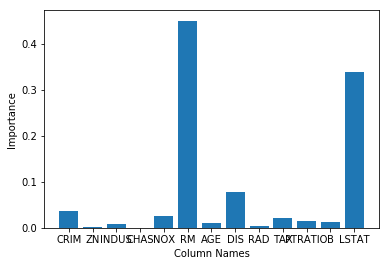

In [24]:
plt.bar(dfColImp.columns, dfColImp.loc[0])
plt.xlabel('Column Names')
plt.ylabel('Importance')
plt.show()

In [27]:
print('Accuracy in train is {} and in test is {}'.format(rfr.score(x_train, y_train), rfr.score(x_test, y_test)))

Accuracy in train is 0.9764075309127385 and in test is 0.8589901284383388


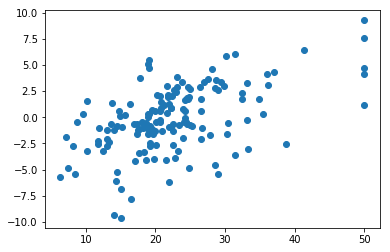

In [46]:
y_predicted = rfr.predict(x_test)
plt.scatter(y_test, (y_test - y_predicted))

In [54]:
print('Square root of mean squared error in the model i.e. variance or std deviation is {}'.format(math.sqrt(mean_squared_error(y_test, y_predicted))))

Square root of mean squared error in the model i.e. variance or std deviation is 3.1579404930895607


<b> 
Due to few reasons, we should try developing model again: </b><br>
    1) There is a pattern in the variance and its against Regression assumptions <br>
    2) Its over fit model as in training accuracy is 97 and in validation it is 85 <br>
    3) There may be multiple variables who are related to each other and in Regression, there shouldnt be co-variance.

 <b> Lets try two things </b> <br>
    1) Lets try to use same model but by tuning hyper parameters  <br>
    2) Lets try to drop unwanted variables <br>

<b> 1 </b>

In [76]:
rfr2 = RandomForestRegressor(bootstrap=True, max_depth=4 , max_features=3 ,n_estimators=10, n_jobs=4)
rfr2.fit(x_train, y_train)
print('Accuracy in train is {} and in test is {}'.format(rfr2.score(x_train, y_train), rfr2.score(x_test, y_test)))

Accuracy in train is 0.888836158252645 and in test is 0.7889241858874744


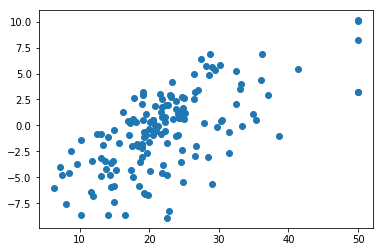

In [77]:
y_predicted2 = rfr2.predict(x_test)
plt.scatter(y_test, (y_test-y_predicted2))
plt.show()

In [78]:
print('Square root of mean squared error in the model i.e. variance or std deviation is {}'.format(math.sqrt(mean_squared_error(y_test, y_predicted2))))

Square root of mean squared error in the model i.e. variance or std deviation is 3.863655714941961


<b> There still seems to be pattern in the variance and standard deviation in prediction went high </b>

<b> 2

In [129]:
x_testCopy = x_test.copy()

In [130]:
x_testCopy['Target'] = y_test

In [131]:
x_testCopy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
221,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46,21.7
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,23.0
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,19.1


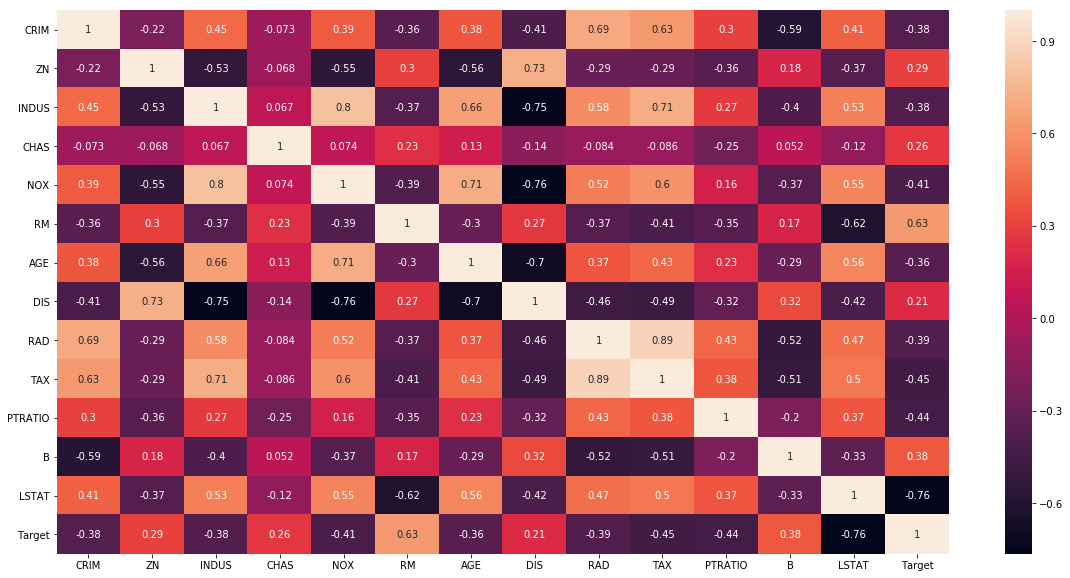

In [132]:
plt.figure(figsize=(20,10))
sns.heatmap(x_testCopy.corr(), annot=True)

<b> Here LSTAT, RM, TAX and PTRATIO are more correlated to the Target than any other </b>

In [88]:
dfCorrMatrix.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [95]:
dfCorrMatrix = x_test.corr()
for i in x_test.columns:
    for j in x_test.columns:
        if(i!=j):
            if(dfCorrMatrix.loc[i, j] > 0.5):
                print('+ve Corr:', i, j)
            elif(dfCorrMatrix.loc[i, j] < -0.5):
                print('-ve Corr:', i, j)

+ve Corr: CRIM RAD
+ve Corr: CRIM TAX
-ve Corr: CRIM B
-ve Corr: ZN INDUS
-ve Corr: ZN NOX
-ve Corr: ZN AGE
+ve Corr: ZN DIS
-ve Corr: INDUS ZN
+ve Corr: INDUS NOX
+ve Corr: INDUS AGE
-ve Corr: INDUS DIS
+ve Corr: INDUS RAD
+ve Corr: INDUS TAX
+ve Corr: INDUS LSTAT
-ve Corr: NOX ZN
+ve Corr: NOX INDUS
+ve Corr: NOX AGE
-ve Corr: NOX DIS
+ve Corr: NOX RAD
+ve Corr: NOX TAX
+ve Corr: NOX LSTAT
-ve Corr: RM LSTAT
-ve Corr: AGE ZN
+ve Corr: AGE INDUS
+ve Corr: AGE NOX
-ve Corr: AGE DIS
+ve Corr: AGE LSTAT
+ve Corr: DIS ZN
-ve Corr: DIS INDUS
-ve Corr: DIS NOX
-ve Corr: DIS AGE
+ve Corr: RAD CRIM
+ve Corr: RAD INDUS
+ve Corr: RAD NOX
+ve Corr: RAD TAX
-ve Corr: RAD B
+ve Corr: TAX CRIM
+ve Corr: TAX INDUS
+ve Corr: TAX NOX
+ve Corr: TAX RAD
-ve Corr: TAX B
+ve Corr: TAX LSTAT
-ve Corr: B CRIM
-ve Corr: B RAD
-ve Corr: B TAX
+ve Corr: LSTAT INDUS
+ve Corr: LSTAT NOX
-ve Corr: LSTAT RM
+ve Corr: LSTAT AGE
+ve Corr: LSTAT TAX


<b> Lets use only LSTAT, RM, TAX and PTRATIO </b>

In [150]:
rfr3 = RandomForestRegressor(bootstrap=True, max_depth=3 , n_estimators=5, n_jobs=4)
rfr3.fit(x_train[['LSTAT', 'RM', 'TAX', 'PTRATIO']], y_train)
print('Accuracy in train is {} and in test is {}'.format(rfr3.score(x_train[['LSTAT', 'RM', 'TAX', 'PTRATIO']], y_train), rfr3.score(x_test[['LSTAT', 'RM', 'TAX', 'PTRATIO']], y_test)))

Accuracy in train is 0.8187674892899253 and in test is 0.795737785407062


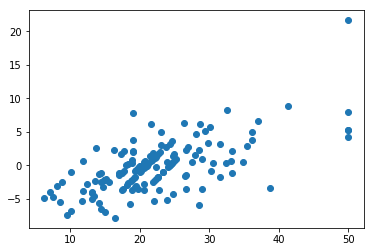

In [153]:
y_predicted3 = rfr3.predict(x_test[['LSTAT', 'RM', 'TAX', 'PTRATIO']])
plt.scatter(y_test, (y_test-y_predicted3))
plt.show()

In [154]:
print('Square root of mean squared error in the model i.e. variance or std deviation is {}'.format(math.sqrt(mean_squared_error(y_test, y_predicted3))))

Square root of mean squared error in the model i.e. variance or std deviation is 3.8007841092579926


<b> After dropping unwanted columns, accuracy score seems to be improved but mean square error is still high. From Residual plot, it looks like there are outliers in both housing prices below 10 and more than 35 where variance not equally surrounded to 0

<b> In Assignment, it's said to perform Random Forrest after normalization i.e. using PrincipalComponentAnalysis. But this is yet to be started in current module. It will be in future modules. </b>